# Breast Cancer Predictor

##### By Bourhan DERNAYKA

___
## 1. Data acquisition 

In [423]:
from breastcancer_utils import *
import matplotlib.pyplot as plt
filename = 'wdbc_M1_B0.data'

In [424]:
X, y = load_breastcancer(filename)
n, m = X.shape
print("There are", n, "different entry, with", m, "parameter each.")

There are 569 different entry, with 30 parameter each.


In [425]:
#y = y.reshape(y.shape[0],1)   this line solves some calculation problems where y might be considered without second dimension,

___
## 2. Subgradient Method 


#### Question 2.1

    Our objective function is the minimization of two sums, the first being half of the sum of the squared elements of the prediction vector $v \in \mathbb{R}^m$:
$$\frac{1}{2}\sum_{j=1}^m{v_j^2}$$ 
    and the second is the sum of the elements of the conditional vector $\xi \in \mathbb{R}^n$ multiplied by c. 

These conditions are that each $\xi_i$ for i in [1,n] should be greater than or equal to:

- $\xi_i \geq 0$

- $\xi_i \geq 1 - y_i (x_i^T v + a)$

    So $\xi_i$ must qualify both conditions at the same time, so the minimum it is permitted to be will be the maximum between these two conditions in order to fulfill them concurrently.
    Hence, we can replace all $\xi_i$ for i in [1,n] by the max() function of the two conditions, so we get :
    $$ objective = \frac{1}{2}\sum_{j=1}^m{v_j^2} + c \sum_{i=1}^n{max(0, 1 - y_i (x_i^T v + a)} $$ 

___
#### Question 2.2

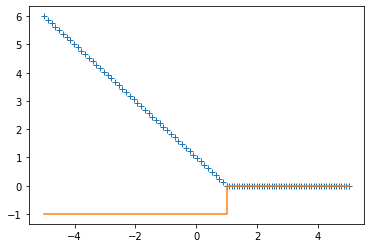

In [426]:
z1 = np.linspace(-5, 1, 50)
z2 = np.linspace(1, 5, 50)
z = np.hstack([z1, z2])
h = np.hstack([1-z1, z2*0])
dh = np.hstack([-1*np.ones(len(z1)), z2*0])
plt.plot(z,h,'+', z,dh)

   The $h(z)$ function is defined by parts.<br> 
   We can see in blue the $h(z)$ function, it is descendant in the first part, constant in the second part.
   <br>Hence, its derivative is negative in the first part, null in the second.

___
#### Question 2.3

 $$ f(v, a) = \frac{1}{2}\sum_{j=1}^m{v_j^2} + c \sum_{i=1}^n{max(0, 1 - y_i (x_i^T v + a)} $$ 
 
We set $ N(v,a) = \frac{1}{2}\sum_{j=1}^m{v_j^2} $ a function dependant of the vector $v \in \mathbb{R}^m$
 <br>and
 
 <span>$ H(M(v,a)) = \sum_{i=1}^n{max(0, 1 - y_i (x_i^T v + a)\ )}$<br>   
 Where the function $ H(t)\ =\ \sum_{i=1}^n{max(0, 1 - t_i)}\ \ $
    and $M(v,a)$ is a vector of length n.
    
In fact, $M$ is a linear application applied on the elements of the vector $(v,a) \in \mathbb{R}^{m+1}$, 
    since $ M_{i={1..n}}(v,a) = y_i (x_i^T v + a)$, we can write:
    $$ M_{i={1..n}}(v,a) = y^T (x_i^T . v + a) = y^T ({xe}_i^T . va ) $$
    
where ${xe}_i \in \mathbb{R}^{m+1}$ and $va = (v,a) \in \mathbb{R}^{m+1}$
    
  So, we can conclude that $ M = Y . X_e \in \mathbb{R}^{nxm+1}$ where $Y$ is a n-diagonal matrix of $y_i$ and $X_e$ is the augmented matrix in $\mathbb{R}^{nxm+1}$ with the last column made of ones.

___
Hence we have $ f(v, a) = N(v,a) + c H(M\ .\ va) $, a separable function.

Its derivative will be:  $ \partial f(v, a) = \partial N(v,a) + c\ M^T \partial H(M(v,a))\ $ using the derivative formula of a function with linear application.



$\partial N(t) = t$ $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $where $t \in \mathbb{R}^m+1$

$\partial H(t) = \partial h(t_1)\ x\ ...\ x\  \partial h(t_{m+1}) $ $\ \ \ \ \ \ $ where $\partial h$ is defined in Question 2.2

___
#### Question 2.4

In [427]:
ones = np.ones((n,1))
Xe = np.hstack((X, ones))
M = np.diag(y).dot(Xe)
M.shape

(569, 31)

In [428]:
def objective(v, a):
        """
            returns the objective function value for the specified inputs
            Note: c must be defined preliminary, 
                    along with X (the covariates matrix), 
                    and y the output vector of our data.
        """
        N = np.sum(v ** 2)/2
        Mva = np.ones(n) - y * (np.dot(X, v) + a)
        H = sum(Mva * (Mva>0)) 
        obj = N + c * H
        
        ones = np.ones((n,1))
        Xe = np.hstack((X, ones))
        M = np.diag(y).dot(Xe)
        dH = np.zeros(n)
        for i in range(n):
            if Mva[i] > 0:
                dH[i] = -1
        dN = np.hstack((v, 0)).T
        grad = dN + c * M.T.dot(dH)
        
        return obj, grad

In [382]:
V = np.ones(m)
a = 1; c = 1
objective(V, a)

(603.8252882581148,
 array([-38.73829648, -20.70475549, -34.49379607, -34.9876155 ,
         38.59618269,  45.35166232,  23.55585667,   1.95675574,
         36.5927392 ,  89.42902745,  -6.13062046,  28.6170554 ,
          0.18689247, -13.53182243,  59.92957203,  84.51089819,
         72.68924277,  60.05022852,  41.47511889,  99.88454603,
        -39.4982886 , -27.61455329, -34.31830559, -34.37001474,
         18.65124737,  28.15298039,  20.26382933,  -2.07793185,
         -2.28514378,  55.68259705,  26.        ]))

##### a neat way to build the objective: #ignore#

In [429]:
N = np.sum(V ** 2)/2
Xe = np.hstack((X, ones))
Va = np.hstack((V, a))
Mva = 1 - y * np.dot(Xe, Va)
M = (Xe.T * y).T
H = sum(Mva * (Mva>0))
f = N + c * H
f

603.8252882581148

___
#### Question 2.5

In [432]:
def norm(vect):
    return np.sqrt(np.sum(np.square(vect)))

In [433]:
def gradient(V, a):
    Va0 = np.hstack((V, a))
    mod0 = np.inf 
    goal2=list()
    for k in range(0,10000):
        gamma = 1 / (k + 1)
        grad = objective(Va0[:-1], Va0[-1])[1]
        mod = norm(grad)
        #print(mod)
        Va  = Va0 - gamma * grad
        Va0 = Va
        
        mod0 = mod
        goal2 = goal2 + [objective(Va0[:-1], Va0[-1])[0]]
    #print(goal2)
    return Va[:-1], Va[-1], goal2

---
##### Test with zeros:

In [434]:
V0 = np.zeros(m); a0 = 0
print(objective(V0, a0))
Vopt, aopt, goal2 = gradient(V0, a0)

objective(Vopt, aopt)

(569.0, array([-401.67227502, -228.44097367, -408.60883936, -390.09318973,
       -197.28489321, -328.22148127, -383.14721063, -427.3041985 ,
       -181.84509798,    7.0634352 , -312.04525371,    4.56861423,
       -305.99668108, -301.64736575,   36.873181  , -161.21243374,
       -139.60579724, -224.51080955,    3.58836467,  -42.90155493,
       -427.21613038, -251.39455908, -430.77071337, -403.76117734,
       -231.89607933, -325.17580208, -362.92710448, -436.63153222,
       -229.05116772, -178.19917556,  145.        ]))


(26.58455025371073,
 array([ 2.03063272, -0.9611799 ,  1.61834199,  2.04766806, -4.84796227,
        -5.10335695, -3.57037182, -2.33589113, -5.12372002, -4.83122008,
         2.82118474, -1.33184844,  1.56231412,  1.99997122, -3.18614696,
        -6.10099066, -5.66910111, -3.80741963, -4.55455713, -3.22669201,
         1.84103496, -1.94109599,  1.20020529,  1.71995579, -4.02554551,
        -4.50742006, -4.52611778, -3.21616738, -4.1301077 , -3.61746869,
        -2.        ]))

---
##### Test with ones:

In [399]:
V0 = np.ones(m); a0 = 1
print(objective(V0, a0)[0:1])
Vopt, aopt, goal22 = gradient(V0, a0)

objective(Vopt, aopt)

(603.8252882581148,)


(26.53689555318948,
 array([ 0.18195168,  0.94054712,  0.35516952, -0.15205002,  0.8244559 ,
         3.21611425,  0.86139221,  0.64485046,  2.52556414,  2.07984036,
        -1.63198288, -0.26969245, -1.07659087, -0.97133772,  0.63077604,
         5.18433793,  0.55072144, -0.215716  ,  3.33709558,  2.52509351,
         0.20728638,  1.40391121,  0.52276148, -0.15571956,  1.82368762,
         4.84113034,  1.8431172 ,  1.22342048,  5.83732042,  3.90970319,
         2.        ]))

___
##### Extra: Gradient function accuracy verification

In [57]:
def Gvec(Va):
    return objective(Va[:-1], Va[-1])[0]
def gradGvec(Va):
    return objective(Va[:-1], Va[-1])[1].ravel()

In [58]:
from scipy.optimize import check_grad
V0 = np.ones(m); a0 = 1
err = check_grad(Gvec, gradGvec, np.hstack((V0, a0)))
print("the gradient error for initializationvalues of 1 is:", err)
V0 = np.zeros(m); a0 = 0
err = check_grad(Gvec, gradGvec, np.hstack((V0, a0)))
print("the gradient error for initializationvalues of 0 is:", err)

the gradient error for initializationvalues of 1 is: 7.280418426132196e-05
the gradient error for initializationvalues of 0 is: 0.00014103374334746124


Hence, our gradient function representation is accurate.

___
## 3. Stochastic Subgradient Method 

#### Question 3.1

We know that a function $f_I$ that has a random variable parameter $I \sim U[1,n]$, has an expectance of $f_I * uniform\ distribution = f_I * 1/n$ 

 $$ f_i(v, a) = \frac{1}{2}\sum_{j=1}^m{v_j^2} + cn {max(0, 1 - y_i (x_i^T v + a))} $$
 
 $ \mathbb{E}{[f_i(v, a)] = \mathbb{E}[\frac{1}{2}\sum_{j=1}^m{v_j^2} + cn *{max(0, 1 - y_i (x_i^T v + a))}]}\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 
                         = \frac{1}{2}\sum_{j=1}^m{v_j^2} + cn * \mathbb{E}[{max(0, 1 - y_i (x_i^T v + a))}]\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 
                         = \frac{1}{2}\sum_{j=1}^m{v_j^2} + cn *\sum_{k=1}^n{ \frac{1}{n} max(0, 1 - y_k (x_k^T v + a))]}\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  
                         = \frac{1}{2}\sum_{j=1}^m{v_j^2} + c n/n *\sum_{i=1}^n{max(0, 1 - y_i (x_i^T v + a)}
                         \\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = f(v,a)
 $

___
#### Question 3.2

$$ f_i(v, a) = \frac{1}{2}\sum_{j=1}^m{v_j^2} + cn {max(0, 1 - y_i (x_i^T v + a)} $$

$\partial f_i(v, a) = \frac{1}{2}\partial{\sum_{j=1}^m{v_j^2}} + cn *\partial{{max(0, 1 - y_i (x_i^T v + a))}}\\$
$\partial f_i(v, a) = \frac{1}{2}\partial{\|\| v\|\|_2^2} + cn *\prod _{j=1}^{m+1} \partial{h_j(y_i (x_i^T v + a))}\\ $

$\partial f_i(v, a) = \binom{v}{0} + cn *\prod _{j=1}^{m+1} \partial{h_j(y_i (x_i^T v + a))}$ where the $\partial h_j$ are those defined in question 2.3

$\partial f_i(v, a) = \binom{v}{0} + cn * [\ \  -1\ $ if $y_i (x_i^T v + a) < 1,\ \ \ \ \  0\ $if $y_i (x_i^T v + a) > 1,\ \ \ \ \  [-1, 0]$ else$\ \ ]$

We note that $\partial f_i(v, a)$ is in $\mathbb{R}^{m+1}$

___
#### Question 3.3

In [187]:
def objective_i(v, a, i):
        """
            returns the objective function value and the gradient for the specified inputs
                    taking into consideration the i_th sample.
            Note: c must be defined preliminary, 
                    along with X (the covariates matrix), 
                    and y the output vector of our data.
        """
        N = np.sum(v ** 2)/2
        Mva = 1 - y[i] * (np.dot(X[i], v) + a)
        H = Mva * (Mva>0) 
        obj = N + c * H
        
        ones = np.ones(1)
        Xe = np.hstack((X[i], ones))
        M = y[i]*Xe
        dH = np.zeros(1)
        if Mva > 0:
                dH[0] = -1
        dN = np.hstack((v, 0)).T
        grad = dN + c * dH * M.T
        
        return obj, grad

In [400]:
def gradientStat(V, a):
    Va0 = np.hstack((V, a))
    mod0 = np.inf 
    goal3 = list()
    for k in range(0,10000):
        i = int(np.random.uniform(0,n))
        gamma = 1 / (k + 1)
        grad = objective_i(Va0[:-1], Va0[-1], i)[1]
        mod = norm(grad)
        #print(mod)
        Va  = Va0 - gamma * grad
        Va0 = Va
        
        mod0 = mod
        goal3 = goal3 + [objective(Va[:-1], Va[-1])[0]]
    return Va[:-1], Va[-1], goal3

In [401]:
from scipy.stats import uniform
i = int(np.random.uniform(0,n))

V0 = np.zeros(m); a0 = 0
print(objective(V0, a0))
Vopt, aopt, goal3 = gradientStat(V0, a0)
opt = objective_i(Vopt, aopt, i)[0]
objective(Vopt, aopt)

(569.0, array([-401.67227502, -228.44097367, -408.60883936, -390.09318973,
       -197.28489321, -328.22148127, -383.14721063, -427.3041985 ,
       -181.84509798,    7.0634352 , -312.04525371,    4.56861423,
       -305.99668108, -301.64736575,   36.873181  , -161.21243374,
       -139.60579724, -224.51080955,    3.58836467,  -42.90155493,
       -427.21613038, -251.39455908, -430.77071337, -403.76117734,
       -231.89607933, -325.17580208, -362.92710448, -436.63153222,
       -229.05116772, -178.19917556,  145.        ]))


(103.27170604026315,
 array([-57.4998668 , -46.74541749, -57.13534282, -54.53395882,
        -24.20718143, -28.46233587, -48.28432416, -61.92130961,
        -28.60598646,  20.40563778, -46.13587606,   6.92663012,
        -39.5713135 , -40.50052053,  -9.07044304,  -0.87801172,
         11.46108256, -12.62532016,   2.74059444,  22.1053938 ,
        -67.32666222, -59.40136665, -64.97484844, -60.50036564,
        -58.03578302, -46.10706639, -50.27369993, -68.90371468,
        -55.17765377, -28.38435826, -20.        ]))

___
## 4. Augmented Lagrangian Method 

#### Question 4.1

Problem (1) is conditionned by two inequalities, we will transform them to the following shape: 

1) $$- \xi \leq 0 $$

2) $$ - \xi_i + 1 - y_i (x_i^T v + a) \leq 0$$


Hence, the associated Langrangianof Problem (1) is:
$$ 
    L(v, a, \xi, \phi, \psi) = \frac{1}{2}\| v\|_2^2 + c \sum_{i=1}^n{\xi_i} - \xi . \phi + \sum_{j=1}^n{ \psi_j . (- \xi_j + 1 - y_j (x_j^T v + a))}
$$

where $\phi , \psi \in \mathbb{R}^n$

So, we note that we have $2n$ Lagrange equation variables.

___
#### Question 4.2

$$ g(x, \phi) = - \frac{1}{2\rho} \phi^2 + \frac{\rho}{2} (max(0, x + \rho^{-1} \phi))^2 $$

For the derivative in relation to $x$:

$ \nabla_x g(x, \phi) = - 0 + \frac{\rho}{2}*2 max(0, x + \frac{\phi}{\rho}) * \frac{\partial max(0, x + \frac{\phi}{\rho})}{\partial x} $

but $\frac{\partial max(0, x + \frac{\phi}{\rho} )}{\partial x} $ is equal to 1 if $x + \frac{\phi}{\rho} > 0$ and the first term of $ \nabla_x g(x, \phi)$ takes care of that, hence:
$$ \nabla_x g(x, \phi) = max(0, x + \frac{\phi}{\rho})$$

For the derivative in relation to $\phi$:

$ \nabla_\phi g(x, \phi) =  - \frac{\phi}{\rho} + \rho max(0, x + \frac{\phi}{\rho}) * \frac{1}{\rho}\frac{\partial max(0, x + \frac{\phi}{\rho})}{\partial \phi} $ 

using the same logic, we get:

$ \nabla_\phi g(x, \phi) =  - \frac{\phi}{\rho} + \rho/\rho \ max(0, x + \frac{\phi}{\rho}) = - \frac{\phi}{\rho} + max(0, x + \frac{\phi}{\rho})$ 

Which is equivalent to:
$$
    \nabla_\phi g(x, \phi) = max(-\frac{\phi}{\rho}, x + \frac{\phi}{\rho} -\frac{\phi}{\rho}) = max(-\frac{\phi}{\rho}, x)
$$

___
#### Question 4.3

$$ g(x, \phi) = - \frac{1}{2\rho} \phi^2 + \frac{\rho}{2} (max(0, x + \rho^{-1} \phi))^2 $$

The function $x \to g(x, \phi)$ is made up of two parts, the first is constant in regard to $x$, and the second is a build of two convex functions: max(0, x + cst) and the square function. 

$ g(x, \phi)\ \ \sim\ \ (.^2\ o\ max(0, .))(x)$, hence it is convexe.

[Proof of convexity of max(0,x)]: 

let x, y in R and t in [0,1]:

$tx + (1-t)y \leq t max(0, x) + (1-t) max(0, y)$ so:
   
$$max(tx + (1-t)y) \leq t max(0, x) + (1-t) max(0, y)$$
                                
<br><br>              
The function $\phi \to g(x, \phi)$ is goverened by its first term, since it is always negative. Because the square function is convexe, then the opposite (multiplied by -1) is concave, it has a maximum. And, for the other part of the function, it is either 0 or equivalent to a linear function of $\phi$ with coefficients of $x$, which is here constant. 

NB: calculations made by hand... proof: $x(\phi + \rho x/2)$

Therefore, that second part is both concave and convex, so it does not alter the convexity of the whole function.

Hence, $\phi \to g(x, \phi)$ is concave.

___
#### Question 4.4

In [295]:
def norm1(vect):
    """first order norm of a vector"""
    return np.sum(np.abs(vect))

In [296]:
def norm2(vect):
    """squared second order norm of a vector"""
    return np.sum(np.square(vect))

In [305]:
def func_vect(func, x, phi):
    """
        Description: The aim of this function is to run the input function 
                        named 'func' on each pair (x_i, phi_i) of the input vectors
                            func(x_i, phi_i)
        Input: @func a function from R^2 in R
               @x the first vector variable
               @phi the second vector variable
    """

    if len(x) != len(phi):
        raise ValueError('dimensions do not match')
    length = len(x)
    res = np.zeros(length)
    for i in range(length):
        res[i] = func(x[i], phi[i])
    return res

In [306]:
def g(x, phi):
    p1 = - 0.5/rho * np.power(phi, 2)
    p2 = 0.5 * rho * np.power( max( 0, x + phi / rho ), 2)
    return p1 + p2

In [307]:
def Lagrangian(v, a, xi, phi, psi):
    p1 = 0.5 * norm2(v)
    p2 = c * np.sum(xi)
    p3 = np.sum(func_vect(g, -xi, phi))
    
    ones_n = np.ones(n)
    Y = np.diag(y)
    vect_n = -xi + ones_n - Y.dot(X.dot(v) + a * ones_n)
    p4 = np.sum(func_vect(g, vect_n, phi))
    return p1 + p2 + p3 + p4

In [308]:
def gradGFirst(x, PHI):
    return rho * max(0, x + PHI/rho)

In [346]:
def gradLagrangianMin(v, a, xi, PHI, PSI):
    """
        Description: computes the gradient of the Lagrangian function in relation to the problem's
                    main variables: v, a and xi where PHI and PSI are considered here known and constant.
    """
    ones_n = np.ones(n)
    Y = np.diag(y)
    vect_n = -xi + ones_n - Y.dot(X.dot(v) + a * ones_n)
    
    gradV = v + X.T.dot(Y).dot(func_vect(gradGFirst, vect_n, PSI))
    
    gradA = np.sum(func_vect(gradGFirst, vect_n, PSI))
    
    gradXi = c * ones_n + func_vect(gradGFirst, -xi, PHI) + func_vect(gradGFirst, vect_n, PSI)
    
    return gradV, gradA, gradXi

In [354]:
def lineSearch(v, a, xi, PHI, PSI, A, B, l):
    print("   line search started")
    gradV, gradA, gradXi = gradLagrangianMin(v, a, xi, PHI, PSI)
    grad = np.hstack((gradV, gradA, gradXi))
    x = np.hstack((v, a, xi))
    
    gamma = B*A**l
    print("        initial gamma =", gamma)
    v_plus = v - gamma * gradV
    a_plus = a - gamma * gradA
    xi_plus = xi - gamma * gradXi
    x_plus = np.hstack((v_plus, a_plus, xi_plus))
    
    while Lagrangian(v_plus, a_plus, xi_plus, PHI, PSI) > \
            Lagrangian(v, a, xi, PHI, PSI) + grad.dot(x_plus - x) + 0.5*gamma * norm2(x_plus - x):
        l+=1
        gamma = B*A**l
        print("            gamma search=", gamma)
    
        v_plus = v - gamma * gradV
        a_plus = a - gamma * gradA
        xi_plus = xi - gamma * gradXi
        x_plus = np.hstack((v_plus, a_plus, xi_plus))
    return B*A**l

In [363]:
def gradientLineSearch(vOld, aOld, xiOld, PHI, PSI):
    gradV, gradA, gradXi = gradLagrangianMin(vOld, aOld, xiOld, PHI, PSI)
    grad = np.hstack((gradV, gradA, gradXi))
    gamma = 1
    while norm1(grad) > epsilon:
        print("module of grad",norm1(grad))
        gradV, gradA, gradXi = gradLagrangianMin(vOld, aOld, xiOld, PHI, PSI)
        grad = np.hstack((gradV, gradA, gradXi))
        
        A = 0.5; B= 2 * gamma; l = 0
        gamma = lineSearch(vOld, aOld, xiOld, PHI, PSI, A, B, l)
        print("   found gamma=",gamma)
        
        
        v = vOld - gamma * gradV
        a = aOld - gamma * gradA
        xi = xiOld - gamma * gradXi
        
        vOld = v; aOld = a; xiOld = xi
        
        if(gamma < 1e-20):
            print("    gamma tooooo small, stopping...")
            break
    return v, a, xi

In [365]:
rho = 2; epsilon = 1
v, a, xi, PHI, PSI = np.ones(m), 0, np.ones(n), np.ones(n), np.ones(n)
vOpt, aOpt, xiOpt = gradientLineSearch(v, a, xi, PHI, PSI)

module of grad 30410.79650712112
   line search started
        initial gamma = 2.0
            gamma search= 1.0
            gamma search= 0.5
            gamma search= 0.25
            gamma search= 0.125
            gamma search= 0.0625
            gamma search= 0.03125
            gamma search= 0.015625
            gamma search= 0.0078125
            gamma search= 0.00390625
            gamma search= 0.001953125
            gamma search= 0.0009765625
            gamma search= 0.00048828125
            gamma search= 0.000244140625
            gamma search= 0.0001220703125
            gamma search= 6.103515625e-05
            gamma search= 3.0517578125e-05
            gamma search= 1.52587890625e-05
            gamma search= 7.62939453125e-06
            gamma search= 3.814697265625e-06
            gamma search= 1.9073486328125e-06
            gamma search= 9.5367431640625e-07
            gamma search= 4.76837158203125e-07
            gamma search= 2.384185791015625e-07
            g

___
#### Question 4.5

The gradient of the Lagrangian function according to $\phi$ and $\psi$ is on size $2n$<br>
It is the derivative of the g() functions in relation to $\phi$ and $\psi$ respectively.

We will code the gradient of g in the both cases, then directly code the full gradient equation:

In [366]:
def gradGSecond(FIRST, phi):
    return max(-phi/rho, FIRST)

In [370]:
def gradLagrangianMax(V, A, XI, phi, psi):
    """
        returns the gradiant of the Lagrangian function in relation to Phi and Psi
    """
    gradPhi = func_vect(gradGSecond, - XI, phi)
    
    ones_n = np.ones(n)
    Y = np.diag(y)
    vect_n = -XI + ones_n - Y.dot(X.dot(V) + A * ones_n)
    gradPsi = func_vect(gradGSecond, vect_n, psi)

    return gradPhi, gradPsi

Just testing:

In [371]:
phi, psi = np.ones(n), np.ones(n)
gradLagrangianMax(vOpt, aOpt, xiOpt, phi, psi)

(array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, 

___
#### Question 4.6

In [422]:
def augmentedLagrangian(vOld, aOld, xiOld, phiOld, psiOld):
    """
        description: runs the Augmented Lagrangian algorithm on the given initial values
        inputs:
            - v: a vector in Rm
            - a: a scalar
            - xi: a vector in Rn
            - phi: first Lagrangian parameter of length n
            - psi: second Lagrangian parameter of length n
    """
    goal4 = list()
    for i in range(200):
        v, a, xi = gradientLineSearch(vOld, aOld, xiOld, phiOld, psiOld)
        gradPhi, gradPsi = gradLagrangianMax(v, a, xi, phiOld, psiOld)
        phi = phiOld + rho * gradPhi 
        psi = psiOld + rho * gradPsi
        vOld, aOld, xiOld, phiOld, psiOld = v, a, xi, phi, psi
        goal4 = goal4 + [objective1(v, a, xi)]
    return v, a, xi, phi, psi, goal4

This might take approx 10 mins for 200 iteration, this can be lowered.

In [420]:
v0 = np.zeros(m)
a0 = 0
xi0 = np.zeros(n)
phi0 = np.zeros(n)
psi0 = np.zeros(n)
v, a, xi, phi, psi, goal4 = augmentedLagrangian(v0, a0, xi0, phi0, psi0)

module of grad 18372.310183999467
   line search started
        initial gamma = 2.0
            gamma search= 1.0
            gamma search= 0.5
            gamma search= 0.25
            gamma search= 0.125
            gamma search= 0.0625
            gamma search= 0.03125
            gamma search= 0.015625
            gamma search= 0.0078125
            gamma search= 0.00390625
            gamma search= 0.001953125
            gamma search= 0.0009765625
            gamma search= 0.00048828125
            gamma search= 0.000244140625
            gamma search= 0.0001220703125
            gamma search= 6.103515625e-05
            gamma search= 3.0517578125e-05
            gamma search= 1.52587890625e-05
            gamma search= 7.62939453125e-06
            gamma search= 3.814697265625e-06
            gamma search= 1.9073486328125e-06
            gamma search= 9.5367431640625e-07
            gamma search= 4.76837158203125e-07
            gamma search= 2.384185791015625e-07
            

ValueError: not enough values to unpack (expected 6, got 5)

In [435]:
def objective1(v, a, xi):
    p1 = 0.5 * norm2(v)
    p2 = c * np.sum(xi)
    
    return p1 + p2

In [436]:
objective1(v, a, xi)

-2.0257454678076635e-17

___
## 5. Comparison

NameError: name 'goal4' is not defined

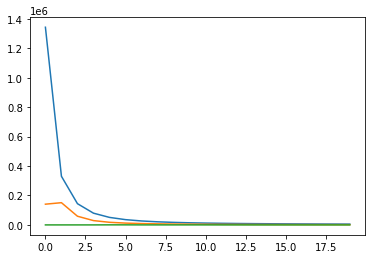

In [421]:
import matplotlib.pyplot as plt
plt.plot( goal2[:20])
plt.plot(goal22[:20])
plt.plot( goal3[:20])
plt.plot( goal4[:20])

We need to mention here that the Stohastic Gradient Descent has a better behaviour the more our sample is bigger, hence using it on a sample of n=569 is fair enough.

Actually, the main goal of SGD is to not be forced to do calculations on our big sample of order n, instead we just choose one sample, and study our objective as if that sample was our only model, and we continue picking uniformly random sample on each iteration.

For the Augmented Lagrangian method, we are promised to get a good minimized objective since it does not aim to strictly fulfill the inequality conditions but it tries to get the most closer to them.

We also use the line search with it, which should optimize the amplitude of each step towards the solution.

As for the initial Gradient Method, we can see both curves, the first blue one is when the values were initialized to 0, and the orange one is for when the initial values were 1. They both converge to almost the same value.

For the SGD curve, it starts lower than that of the full gradient, but ends somewhere higher.

In [418]:
goal2[0], goal2[-1], goal3[-1]

(1342660.7300801536, 26.58455025371073, 103.27170604026315)

We see that the SGD didn't get us to the exact minima, but it is very close with really low memory usage and high speeds.

This method is very useful to get an initial feedback of the data we are dealing with.